In [1]:
from sklearn.linear_model import LinearRegression, Ridge 
import pandas as pd
import numpy as np
import utils 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = np.loadtxt('data_w3_ex1.csv', delimiter=',')

In [3]:
data[:5]

array([[1651.        ,  432.64521724],
       [1691.81632653,  454.93552962],
       [1732.63265306,  471.52524758],
       [1773.44897959,  482.50638875],
       [1814.26530612,  468.35788634]])

In [4]:
# Split the inputs and outputs into separate arrays
x = data[:,0]
y = data[:,1]

# now i will converet the x and y to 2darray 
x = np.expand_dims(x, axis=1)
y=np.expand_dims(y, axis=1)

In [5]:
x.shape, y.shape

((50, 1), (50, 1))

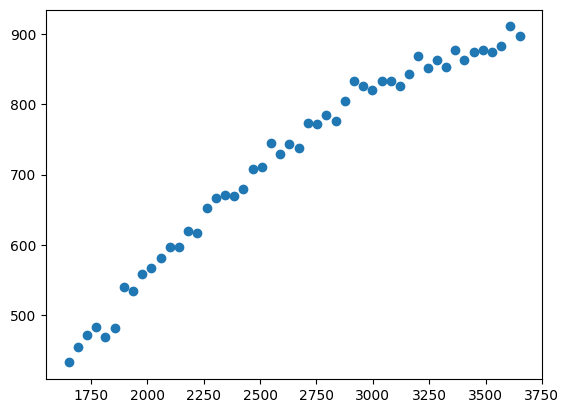

In [6]:
# now lets plot the data to have more understanding
plt.scatter(x,y)
plt.show()

In [7]:
# now i will take the 60% of the data as a training set, and the remaining data to be a cross validation set and test set
x_train, x_, y_train, y_ = train_test_split(x,y, test_size=0.40, random_state=1)

# now i will split the 40% of the test_set to two: 1- cross_validation set, test,set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

del x_, y_

In [8]:
x_train.shape, y_train.shape

((30, 1), (30, 1))

In [9]:
x_test.shape, x_cv.shape

((10, 1), (10, 1))

In [10]:
y_test.shape, y_cv.shape

((10, 1), (10, 1))

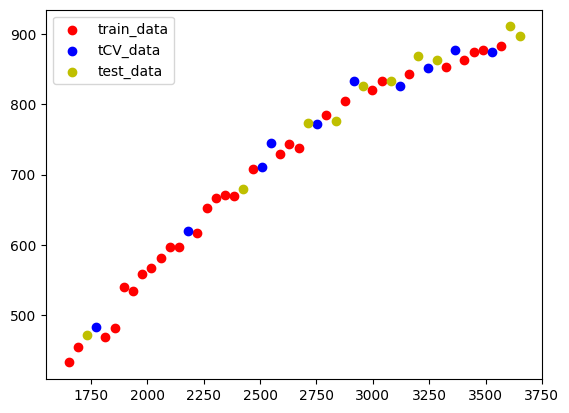

In [11]:
plt.scatter(x_train, y_train, color='r', label='train_data')
plt.scatter(x_cv, y_cv, color='b', label='tCV_data')
plt.scatter(x_test, y_test, color='y', label='test_data')
plt.legend()
plt.show()


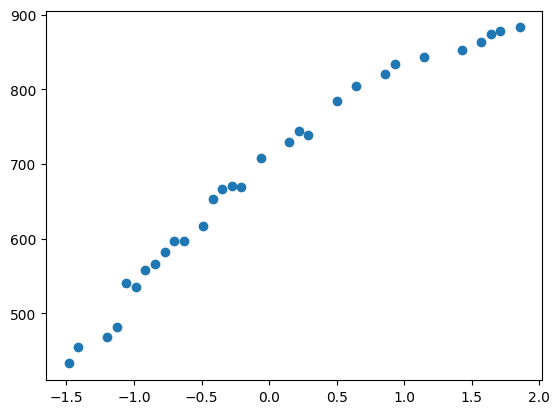

In [12]:
# before fitting the linear model we will make a feature scalling to helo the GD working faster, z-score normalization
scalar_linear = StandardScaler()

x_train_scaled = scalar_linear.fit_transform(x_train)

plt.scatter(x_train_scaled, y_train)
plt.show()

In [13]:
# now we will fit the linear model 

#initialize the instanc from the model class
linear_model = LinearRegression()

#train the model 
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

In [14]:
# now we will evaluate the model using the j_train and the j_cv
y_hat = linear_model.predict(x_train_scaled)

# i will use the sklear utility function and divide it by 2 to evaluate the model
print(f"the mean squared error MSE: {mean_squared_error(y_train, y_hat)/2}")

#for loop implementation to make our handmade MSE 
total_squared_error = 0
for i in range (len(y_hat)):
    squared_error_i = (y_hat[i]-y_train[i])**2
    total_squared_error += squared_error_i
    
mse = total_squared_error / (2*len(y_hat))

print(f"the raining mse: {mse.squeeze()}") #,squeeze used to remove 1 dimesion from the data

the mean squared error MSE: 406.19374192533155
the raining mse: 406.19374192533155


In [15]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scalar_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scalar_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scalar_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE: 551.7789026952216


In [16]:
# now we will try to add more polynomial features as the straight line is not the best model for this data

#instantiate the class to mke polyniomial feature- dah el instance using which i will change the polynomials
poly = PolynomialFeatures(degree=2, include_bias=False)

# now will compute the number of features and transform the training set to have *2 polynomial
x_train_mapped = poly.fit_transform(x_train)

# i made a new feature-polynomial features from the original x_train
print(x_train_mapped[:5])

[[3.32446939e+03 1.10520967e+07]
 [2.34487755e+03 5.49845073e+06]
 [3.48773469e+03 1.21642933e+07]
 [2.63059184e+03 6.92001341e+06]
 [2.58977551e+03 6.70693719e+06]]


In [17]:
# now we will also scale the inputs x-features as always

scaler_poly = StandardScaler()

x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)

print(x_train_mapped_scaled[:5])

[[ 1.42715997  1.47236856]
 [-0.27691164 -0.36461881]
 [ 1.71117191  1.84025141]
 [ 0.22010925  0.1055935 ]
 [ 0.14910627  0.03511397]]


In [18]:
model = LinearRegression()

model.fit(x_train_mapped_scaled, y_train)

yhat=model.predict(x_train_mapped_scaled)

print(f"the mse for the trainging set : {mean_squared_error(yhat, y_train)/2}")

# will do the same steps for the x_cv to measure the compare the MSE 

x_cv_mapped = poly.transform(x_cv)

x_cv_mapped_scalled = scaler_poly.transform(x_cv_mapped)

yhat = model.predict(x_cv_mapped_scalled)

print(f"the cross validation error is: {mean_squared_error(yhat, y_cv)/2}")

the mse for the trainging set : 49.111609334025154
the cross validation error is: 87.6984121111191


In [19]:
# as we see here after adding the 2nd polynomial to the model the model allreadt better fits the data
# we will make all the steps within a loop to compare and choose the best polynomial degree


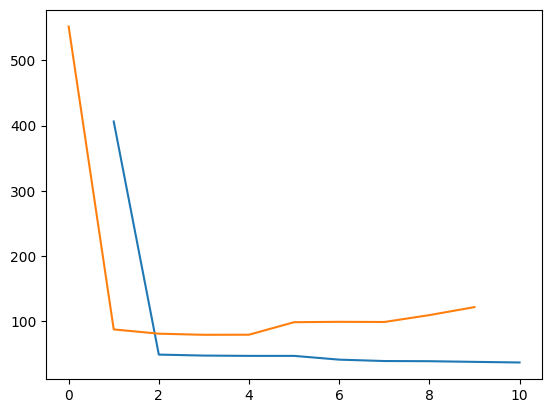

In [20]:
# now we will intialize lists to save the mse's and the models and rhe polynomial degrees to help us to choose the best model

train_mses = []
cv_mses = []
models = []
polys = []
scalers = []
# will loop 10 time and every time will add a poly degree higher than the precious one
for degree in range (1,11):
    # add poltnomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    x_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)
    
    #scale the training set
    scaler_poly = StandardScaler()
    x_train_mapped_scalled = scaler_poly.fit_transform(x_train_mapped)
    scalers.append(scaler_poly)
    
    #create and traing the model
    model = LinearRegression()
    model.fit(x_train_mapped_scalled, y_train)
    models.append(model)
    
    #compute the training MSE 
    yhat = model.predict(x_train_mapped_scalled)
    train_MSE = mean_squared_error(yhat, y_train)/2
    train_mses.append(train_MSE)
    
    #add polynomial features and scale the CROSS VALIDATION set
    x_cv_mapped = poly.transform(x_cv)
    x_cv_mapped_scalled = scaler_poly.transform(x_cv_mapped)
    
    #compute the CROSS VALIDATION MSE 
    yhat = model.predict(x_cv_mapped_scalled)
    cv_mse = mean_squared_error(yhat, y_cv)/2
    cv_mses.append(cv_mse)
    
#plot the results
degrees = range(1,11)

plt.plot(degrees, train_mses, cv_mses)
plt.show()



In [21]:
np.argmin(cv_mses)+1

4

In [22]:
cv_mses

[551.7789026952216,
 87.6984121111191,
 81.15087907197037,
 79.43134912070502,
 79.58685943660193,
 98.74226159416736,
 99.32345423295469,
 99.04845551897822,
 109.58952852540058,
 121.85067511978427]

In [23]:
# now we will choose the model that doing well in both the trainging set the the cross valodation set
degree = np.argmin(cv_mses)+1 # added +1 because the count when slicing starts from 0

print(f"the lowest cross validation error in the model with degree: {degree}")

the lowest cross validation error in the model with degree: 4


In [24]:
# now after chooing the best polynomial model i will generalize it to the test_set and compute the MSE for the test set
# as we did before we will add the polynomial 4 tot the test set 

x_test_mapped = polys[degree-1].transform(x_test)

x_test_mapped_scalled = scalers[degree-1].transform(x_test_mapped)

yhat = models[degree-1].predict(x_test_mapped_scalled)
test_mse = mean_squared_error(yhat, y_test)/2

print(f"train mse: {train_mses[degree-1]:.2f}")
print(f"cross validation mse: {cv_mses[degree-1]:.2f}")
print(f"test mse: {test_mse:.2f}")

train mse: 47.15
cross validation mse: 79.43
test mse: 104.63


In [25]:
# NN - diagnostics and error analysis 

In [26]:
#adding polynimial features to the data 
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
x_train_mapped = poly.fit_transform(x_train)
x_cv_mapped = poly.transform(x_cv)
x_test_mapped = poly.transform(x_test)

In [27]:
#scale the features
scaler = StandardScaler()
x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
x_test_mapped_scaled = scaler.transform(x_test_mapped)

In [28]:
from keras.layers import Input, Dense
from keras.models import Sequential

In [29]:
#build and train the model 
nn_train_mses = []
nn_cv_mses = []

model_1= Sequential([
    Dense(units=3, activation='relu'),
    Dense(units=1, activation='linear')
])

model_2= Sequential([
    Dense(units=4, activation='relu'),
    Dense(units=32, activation='relu'), 
    Dense(units=16, activation='relu'), 
    Dense(units=8, activation='relu'),    
    Dense(units=4, activation='relu'),        
    Dense(units=1, activation='linear')
])

nn_models = [model_1, model_2]

In [30]:
import tensorflow as tf
import keras
from tensorflow.keras.losses import BinaryCrossentropy, mse

In [31]:
# # loop over the different models with different archeticture

# for model in nn_models:
#     #setup the loss and the optimizer
#     model.compile(
#     loss='mse',
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), 
#     )
#     print(f"training {model.name}...")
#     #traing the model
#     model.fit(
#         x_train_mapped_scaled,y_train,
#         epochs=300,
#         verbose=0
    
#     )
#     print('Done!\n')
    
#     # record the trainig mses
#     yhat = model.predict(x_train_mapped_scaled)
#     train_mse = mean_squared_error(y_hat, y_train)/2
#     nn_train_mses.append(train_mse)
    
#     # record the cross validation mses
#     yhat = model.predict(x_cv_mapped_scaled)
#     cv_mse = mean_squared_error(y_cv, yhat)/2
#     nn_cv_mses.append(cv_mse)
    
# #print the results
# print("Results!: ")

# for model_num in range(len(nn_train_mses)):
#     print(
        
#         f"Model {model_num+1}: Training mse: {nn_train_mses[model_num]:.2f}"+
#         f"CV_MSE: {nn_cv_mses[model_num]:.2f}"
#     )
    

In [32]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []


# Loop over the the models
for model in nn_models:
    
    # Setup the loss and optimizer
    model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")
    
    # Train the model
    model.fit(
        x_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0
    )
    
    print("Done!\n")

    
    # Record the training MSEs
    yhat = model.predict(x_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)
    
    # Record the cross validation MSEs 
    yhat = model.predict(x_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

Training sequential...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Training sequential_1...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
RESULTS:
Model 1: Training MSE: 587.71, CV MSE: 603.68
Model 2: Training MSE: 71.24, CV MSE: 87.35


In [33]:
# Select the model with the lowest CV MSE
model_num = 2

# Compute the test MSE
yhat = nn_models[model_num-1].predict(x_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Selected Model: 2
Training MSE: 71.24
Cross Validation MSE: 87.35
Test MSE: 89.04
